In [2]:
import sys
print(sys.executable)
print(sys.path)


/home/ionslard/.pyenv/versions/3.10.6/envs/delorean_art/bin/python
['/home/ionslard/code/Ionslard/delorean_art/delorean_art/notebooks', '/home/ionslard/code/Ionslard/04-Decision-Science/01-Project-Setup/data-context-and-setup', '/home/ionslard/code/Ionslard/delorean_art/delorean_art/notebooks', '/home/ionslard/.pyenv/versions/3.10.6/lib/python310.zip', '/home/ionslard/.pyenv/versions/3.10.6/lib/python3.10', '/home/ionslard/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload', '', '/home/ionslard/.pyenv/versions/3.10.6/envs/delorean_art/lib/python3.10/site-packages']


# Face recogniotion test

## 1. Import du game set d'images

In [26]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd

In [4]:
# Chemin vers le dossier contenant les images
dossier_images = dossier_images = '../raw_data/game_dataset_delorean_art'

# Liste tous les fichiers dans le dossier
fichiers_images = [f for f in os.listdir(dossier_images) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [5]:
# Affiche chaque image
images_data=[]
for fichier in fichiers_images:
    chemin_image = os.path.join(dossier_images, fichier)
    image = Image.open(chemin_image)
    image_array = np.array(image)
    images_data.append(image_array)

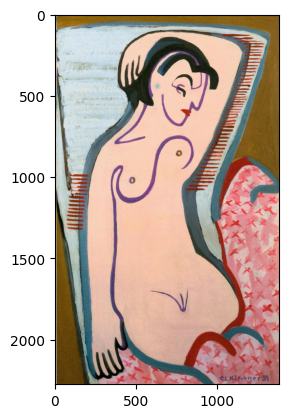

In [6]:
plt.imshow(images_data[0])

In [7]:
len(images_data)

81

# 2. Test de modèles

### 2.1 Deep face

In [15]:
models = [
    "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace",
    "DeepID", "ArcFace", "Dlib", "SFace", "GhostFaceNet",
    "Buffalo_L",
]

result = DeepFace.verify(
  img1_path = "img1.jpg", img2_path = "img2.jpg", model_name = models[0]
)

dfs = DeepFace.find(
  img_path = "img1.jpg", db_path = "C:/my_db", model_name = models[1]
)

embeddings = DeepFace.represent(
  img_path = "img.jpg", model_name = models[2]
)

ValueError: Exception while processing img1_path

#### 2.1.1 Encoding with deep face

In [8]:
import numpy as np
from deepface import DeepFace
import cv2

2025-03-17 15:17:18.559743: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 15:17:18.561440: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 15:17:18.567040: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 15:17:18.573819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742221038.584209   62480 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742221038.58

In [14]:
def represent_face_from_array(img_array):
    # Représenter l'image avec DeepFace à partir d'un tableau NumPy
    embedding = DeepFace.represent(img_array, model_name='VGG-Face',enforce_detection=False)
    return embedding

# Charger les image et la convertir en tableau NumPy
images_embedded_vgg = []
for i, img_array in enumerate(images_data):
    # Vérifie que l'image est chargée correctement
    if img_array is not None:
        # Convertis l'image en RGB (DeepFace utilise des images en RGB)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

        embedding = represent_face_from_array(img_array)
        if embedding is not None:
            images_embedded_vgg.append(embedding)

In [27]:
images_embedded_vgg=pd.DataFrame(images_embedded_vgg)

In [28]:
images_embedded_vgg.shape

(81, 7)

In [29]:
images_embedded[0]

[{'embedding': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.10443671442080418,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.06269385832056716,
   0.009664995659612199,
   0.04152600603393099,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.006630790355763246,
   0.0,
   0.0,
   0.05850954196596633,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.029515113462599024,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.07147999638367296,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,


In [17]:
#### 2.1.1 Comparison with photos with deep face